# Softmax regression

## 1. Setup

In [1]:
# Import necessary modules to access files in another folder in the project
import sys
import os
import mynbconfig
mynbconfig.add_syspath()    # Add project path to python system path to be able to access scripts from other folder

import numpy as np
np.random.seed(2042)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from just4funml.algorithms.supervised import SoftmaxRegression
import just4funml.utils.preprocessing as preprocessing

## 2. Import dataset

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [5]:
X = iris['data'][:, (2, 3)]     # Take only 2 features (petal length & width)
y = iris['target']              

In [6]:
X_train, y_train, X_valid, y_valid, X_test, y_test = preprocessing.train_validation_test_split(X, y, validation_ratio=0.2, test_ratio=0.2, random_state=2042)

## 3. Training model

#### a) Unregularized softmax regression

In [7]:
softmax_reg_unregularized = SoftmaxRegression(learning_rate=0.01, max_iter=5001, random_state=2042)
softmax_reg_unregularized.fit(X_train, y_train)

0 2.4618322572793834
500 0.8960100494383187
1000 0.7194308091680076
1500 0.6187837145478177
2000 0.555410056705779
2500 0.5116324543128722
3000 0.4791389679720147
3500 0.45369533024038217
4000 0.4329611307846497
4500 0.4155472491967997
5000 0.40057839593541056


In [8]:
softmax_reg_unregularized.Theta

array([[ 4.34760282,  0.87104631, -1.0943488 ],
       [-0.02788554,  0.68142209,  0.40516637],
       [-1.55353579,  0.49527305,  2.62423754]])

In [9]:
y_valid_predict = softmax_reg_unregularized.predict(X_valid)

accuracy_score = np.mean(y_valid_predict == y_valid)
print('Accuracy on validation set:', accuracy_score)

Accuracy on validation set: 0.9666666666666667


In [10]:
 accuracy_score = np.mean(softmax_reg_unregularized.predict(X_test) == y_test)
 print('Accuracy on test set:', accuracy_score)

Accuracy on test set: 0.9


#### b) Softmax regression with $l_2$ regularization

In [11]:
softmax_reg_l2 = SoftmaxRegression(learning_rate=0.1, max_iter=5001, alpha=0.1, regularized_type='l2', random_state=2042)
softmax_reg_l2.fit(X_train, y_train)

0 2.5893593869511173
500 0.5390644363970044
1000 0.5049071605467441
1500 0.4951417103517056
2000 0.49147812492947335
2500 0.48997589652362594
3000 0.4893324557531813
3500 0.489049938921872
4000 0.48892400837701916
4500 0.4888673371242108
5000 0.4888416757492373


In [12]:
y_valid_predict = softmax_reg_l2.predict(X_valid)

accuracy_score = np.mean(y_valid_predict == y_valid)
print('Accuracy on validation set:', accuracy_score)

Accuracy on validation set: 1.0


In [13]:
y_test_predict = softmax_reg_l2.predict(X_test)
accuracy_score = np.mean(y_test_predict == y_test)
print('Accuracy on test set', accuracy_score)

Accuracy on test set 0.9333333333333333


**Softmax regression with $l_2$ regularization with early_stopping option enabled**

In [15]:
softmax_reg_early_stop = SoftmaxRegression(learning_rate=0.1, max_iter=5001, regularized_type='l2', alpha=0.1, random_state=2042)
softmax_reg_early_stop.fit_with_early_stopping(X_train, y_train, X_valid, y_valid)                               

0 2.0392966561323487
500 0.5712186106706887
1000 0.5427543296320801
1500 0.5353671267222122
2000 0.5331424065221559
2500 0.5325854810303734
2744 0.5325453999685446 early stopping!


In [16]:
y_valid_predict = softmax_reg_early_stop.predict(X_valid)

accuracy_score = np.mean(y_valid_predict == y_valid)
print(accuracy_score)

1.0


In [17]:
y_test_predict = softmax_reg_early_stop.predict(X_test)
accuracy_score = np.mean(y_test_predict == y_test)
print(accuracy_score)

0.9333333333333333


#### c) Softmax regression with $l_1$ regularization

In [21]:
softmax_reg_l1 = SoftmaxRegression(learning_rate=0.1, max_iter=5001, regularized_type='l1', alpha=0.1, random_state=2042)
softmax_reg_l1.fit(X_train, y_train)

0 2.8120588478661004
500 0.6660373035954155
1000 0.6366550098510336
1500 0.6275347325355969
2000 0.622961099099345
2500 0.6218514928783023
3000 0.6186153026287546
3500 0.6190303213637259
4000 0.6175251237707434
4500 0.6173505906024259
5000 0.6177115479562998


In [22]:
y_vay_valid_predict = softmax_reg_l1.predict(X_valid)

accuracy_score = np.mean(y_valid_predict == y_valid)
print(accuracy_score)

1.0


In [23]:
y_test_predict = softmax_reg_l1.predict(X_test)
accuracy_score = np.mean(y_test_predict == y_test)
print(accuracy_score)

0.9666666666666667


## 4. Visualize the models

In [62]:
def plot_decision_boundary(model, title=None):
    x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )   # Coordinate of the whole plot (x0, x1)
    X_new = np.c_[x0.ravel(), x1.ravel()]

    # Predict every point on the plot
    Y_proba = model.predict(X_new, return_in_prob=True) 
    y_predict = model.predict(X_new) 
                   
    zz1 = Y_proba[:, 1].reshape(x0.shape)       # Get the probability for center class
    zz = y_predict.reshape(x0.shape)            # Get the prediction at each of the point on plot

    # Plot datapoints
    plt.figure(figsize=(10, 4))
    plt.title(title)
    plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
    plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
    plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

    # Plot the color region for different classes
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

    # Create the contour plot based on center class and plot it
    contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
    plt.clabel(contour, inline=1, fontsize=12)

    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.axis([0, 8, 0, 3.5])
    plt.show()

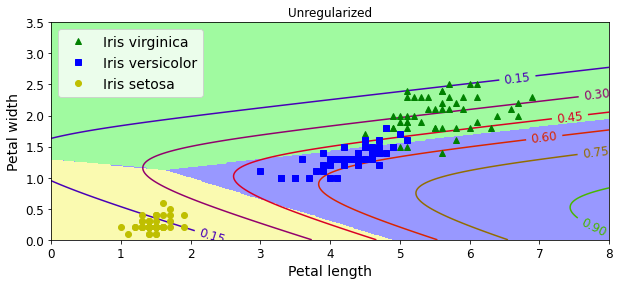

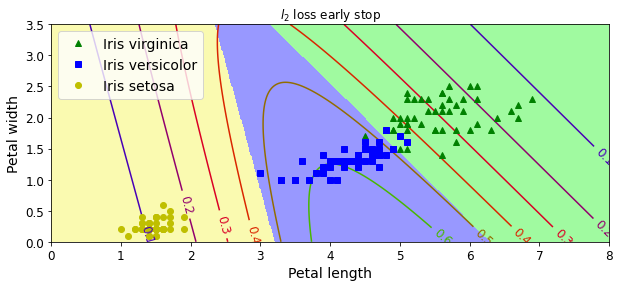

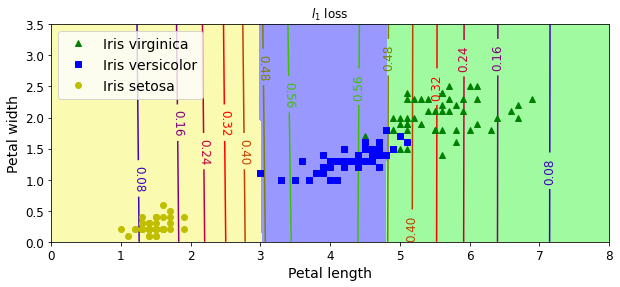

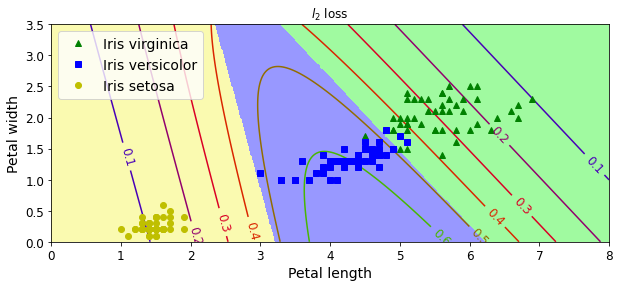

In [64]:
models = {
    'Unregularized': softmax_reg_unregularized,
    '$l_2$ loss early stop': softmax_reg_early_stop,
    '$l_1$ loss': softmax_reg_l1,
    '$l_2$ loss': softmax_reg_l2
}
for model_name in models:
    plot_decision_boundary(models[model_name], title=model_name)